<a href="https://colab.research.google.com/github/Swagaat/prob/blob/main/HW_4_SwagatNeupane_19698.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Solution-1:
from scipy.stats import norm
# These are the given parameters
len_average = 10.3
std_dev = 0.65

# a. Calculating the percentage of lengths less than 9cm
length_a = 9
z_score_a = (length_a - len_average) / std_dev
percentage_a = norm.cdf(z_score_a) * 100

# b. Calculating the percentage of lengths between 9.5cm and 10.6cm
length_b_lower = 9.5
length_b_upper = 10.6
z_score_b_lower = (length_b_lower - len_average) / std_dev
z_score_b_upper = (length_b_upper - len_average) / std_dev
percentage_b = (norm.cdf(z_score_b_upper) - norm.cdf(z_score_b_lower)) * 100

# c. Calculating the Minimum length for the top 20%
percentage_c = 20
z_score_c = norm.ppf(percentage_c / 100)
min_length_c = z_score_c * std_dev + len_average


print(f"a. Percentage of lengths less than {length_a} cm: {percentage_a:.2f}%")
print(f"b. Percentage of lengths between {length_b_lower} cm and {length_b_upper} cm: {percentage_b:.2f}%")
print(f"c. Minimum length for the top {percentage_c}%: {min_length_c:.2f} cm")


a. Percentage of lengths less than 9 cm: 2.28%
b. Percentage of lengths between 9.5 cm and 10.6 cm: 56.86%
c. Minimum length for the top 20%: 9.75 cm


In [2]:
#Solution-3:
import numpy as np
from scipy.stats import binom

p = 0.05
n = 100  # Selecting n greater than 50

# Generating a binomial distribution
binomial_dist = binom(n, p)

# Calculating the mean and standard deviation
mean_calculated = n * p
std_dev_calculated = np.sqrt(n * p * (1 - p))

mean_from_dist = binomial_dist.mean()
std_dev_from_dist = binomial_dist.std()

print(f"Generated Binomial Distribution with p={p} and n={n}")
print(f"Expected Mean (μ): {mean_calculated}, Calculated Mean: {mean_from_dist}")
print(f"Expected Standard Deviation (σ): {std_dev_calculated}, Calculated Standard Deviation: {std_dev_from_dist}")


Generated Binomial Distribution with p=0.05 and n=100
Expected Mean (μ): 5.0, Calculated Mean: 5.0
Expected Standard Deviation (σ): 2.179449471770337, Calculated Standard Deviation: 2.179449471770337


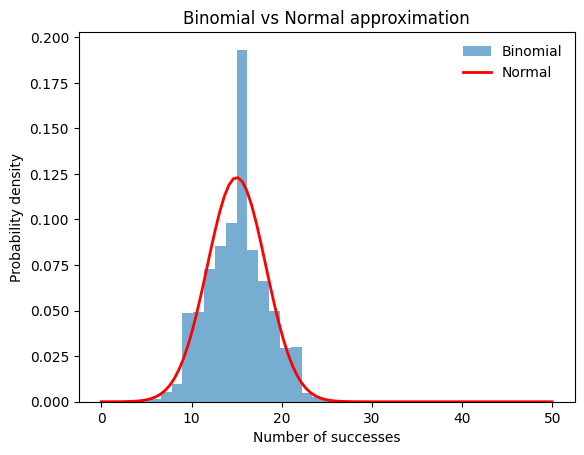

In [3]:
#Solution-4:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

n = 50
p = 0.3

if n*p > 5 and n*(1-p) > 5:
    # Binomial distribution
    binom_dist = binom(n, p)

    # Normal distribution
    mu = n*p
    sigma = np.sqrt(n*p*(1-p))
    norm_dist = norm(mu, sigma)

    # Plotting histograms
    fig, ax = plt.subplots()
    ax.hist(binom_dist.rvs(size=10000), bins=20, density=True, alpha=0.6, label='Binomial')
    ax.plot(np.linspace(0, n, 100), norm_dist.pdf(np.linspace(0, n, 100)), 'r-', lw=2, label='Normal')
    ax.legend(loc='best', frameon=False)
    ax.set_xlabel('Number of successes')
    ax.set_ylabel('Probability density')
    ax.set_title('Binomial vs Normal approximation')
    plt.show()
else:
    print('n*p and n*(1-p) must both be greater than 5')


Mean of 100 random numbers: 0.1164
Standard deviation of 100 random numbers: 1.1918
Mean of sample means: 0.2156
Expected standard deviation of sample means based on CLT: 0.2176


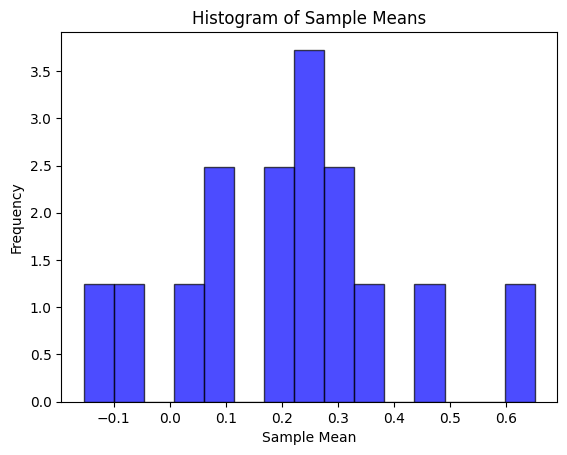

In [4]:
#solution-7:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

df = 10
# Creating 100 random numbers from the T distribution
random_numbers = t.rvs(df, size=100)
# Calculating mean and standard deviation of the 100 random numbers
mu = np.mean(random_numbers)
sigma = np.std(random_numbers)
num_groups = 15
samples_per_group = 30
# Creating an array to store sample means
sample_means = np.zeros(num_groups)
# Generating sampling groups and calculate sample means
for i in range(num_groups):
    # Randomly select 30 samples from the 100 random numbers
    samples = np.random.choice(random_numbers, size=samples_per_group, replace=False)
    # Calculate the sample mean
    sample_means[i] = np.mean(samples)
sigma_x = sigma / np.sqrt(samples_per_group)
print(f"Mean of 100 random numbers: {mu:.4f}")
print(f"Standard deviation of 100 random numbers: {sigma:.4f}")
print(f"Mean of sample means: {np.mean(sample_means):.4f}")
print(f"Expected standard deviation of sample means based on CLT: {sigma_x:.4f}")

plt.hist(sample_means, bins=15, density=True, alpha=0.7, color='b', edgecolor='black')
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()
